## DATA SCIENCE

Group 17

Daniel Lucas  
Ricardo Nobre  
Ricardo Carvalho  
Diogo Torneiro  
Vasco Pombo  

In [198]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


### Imports

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from datetime import date

import warnings
warnings.filterwarnings("ignore")

### Importing Data

In [124]:
original_data = pd.read_csv('cluster.csv')

In [125]:
df = original_data.copy()

In [126]:
df.head()

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
1,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
2,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
3,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
4,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5


| Variable      | Description |
| ----------- | ----------- |
| Name      | Customer’s name       |
| Year Birth    | Customer’s birth year        |
| Longevity   | Whether the customer registered more than 1 year ago or not        |
| Churn   | Whether the customer churned or not (churn or nochurn)        |
| TypeTravel   | Customer’s reason for travelling (business or leisure)        |
| RoomType   | Type of room reserved        |
| RewardPoints   | Customer’s rewarding point for loyalty        |
| Comfort   | Satisfaction level of customer regarding comfort of the room (0 to 5)        |
| ReceptionSchedule   | Satisfaction level of customer regarding reception schedule (0 to 5)        |
| ReceptionSchedule   | Satisfaction level of customer regarding food and drink available (0 to 5)        |
| Location   |   Satisfaction level of customer regarding accommodation location (0 to 5)      |
| Wifi   |    Satisfaction level of customer regarding wi-fi service (0 to 5)     |
| Amenities   | Satisfaction level of customer regarding accommodation amenities(0 to 5)        |
| Staff   | Satisfaction level of customer regarding staff (0 to 5)        |
| OnlineBooking   | Satisfaction level of customer regarding online booking ease(0 to 5)        |
| PriceQuality   | Satisfaction level of customer regarding price quality relationship (0 to 5)        |
| RoomSpace   | Satisfaction level of customer regarding room space (0 to 5)        |
| CheckOut   | Satisfaction level of customer regarding check-out (0 to 5)        |
| CheckIn   | Satisfaction level of customer regarding check-in (0 to 5)        |
| Cleanliness   | Satisfaction level of customer regarding cleanliness (0 to 5)        |
| BarService   | Satisfaction level of customer regarding bar service (0 to 5)        |

## CRISP-DM

### 1. Data Understanding

#### 1.1 Dataframe Size

In [127]:
df_original_row_size = df.shape[0]
df_original_columns_size = df.shape[1]

print("Dataframe has", df_original_row_size, "rows and", df_original_columns_size, "columns")

Dataframe has 15589 rows and 21 columns


#### 1.2 Dataframe Info and Description

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15589 entries, 0 to 15588
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              15589 non-null  object 
 1   Name               15589 non-null  object 
 2   Longevity          15589 non-null  object 
 3   Year_Birth         15394 non-null  float64
 4   TypeTravel         15589 non-null  object 
 5   RoomType           15589 non-null  object 
 6   RewardPoints       15589 non-null  int64  
 7   Comfort            15589 non-null  int64  
 8   ReceptionSchedule  15589 non-null  int64  
 9   FoodDrink          15589 non-null  int64  
 10  Location           15589 non-null  int64  
 11  Wifi               15589 non-null  int64  
 12  Amenities          15589 non-null  int64  
 13  Staff              15589 non-null  int64  
 14  OnlineBooking      15589 non-null  int64  
 15  PriceQuality       15589 non-null  int64  
 16  RoomSpace          155

In [129]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,15394.0,1981.706444,15.179042,1936.0,1970.0,1981.0,1994.0,2014.0
RewardPoints,15589.0,5022.593816,1027.962379,409.0,4445.0,5088.0,5649.0,6950.0
Comfort,15589.0,2.841619,1.388624,0.0,2.0,3.0,4.0,5.0
ReceptionSchedule,15589.0,2.997242,1.518994,0.0,2.0,3.0,4.0,5.0
FoodDrink,15589.0,2.844570,1.436948,0.0,2.0,3.0,4.0,5.0
Location,15589.0,2.986016,1.299438,1.0,2.0,3.0,4.0,5.0
Wifi,15589.0,3.245109,1.327026,0.0,2.0,3.0,4.0,6.0
Amenities,15589.0,3.374816,1.352417,0.0,2.0,4.0,4.0,5.0
Staff,15589.0,3.506383,1.319565,1.0,3.0,4.0,5.0,5.0
OnlineBooking,15589.0,3.454231,1.310343,0.0,2.0,4.0,5.0,5.0


On a first look, we noticed the ranges of each variable look acceptable. However, some variables have different scales than others and this must be handled later on.

#### 1.2.1 Variable Analysis and Congruence Checks

#### 1.2.1.1 Churn

In [130]:
df['Churn'].value_counts()

nochurn    8477
churn      7112
Name: Churn, dtype: int64

Variable looks good to us, we will create dummies for it to make it numerical.

<AxesSubplot:xlabel='Churn', ylabel='count'>

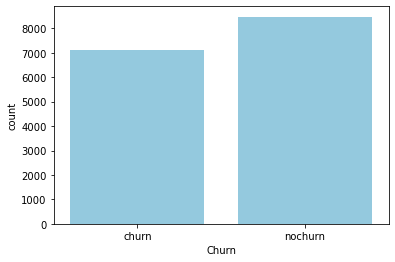

In [131]:
sns.countplot(df["Churn"], color="skyblue")

#### 1.2.1.2 Name

In [132]:
df['Name'].value_counts()

Mr. Michael Smith    9
Ms. Amanda Smith     7
Mr. John Smith       7
Mr. Michael Jones    6
Mr. William Smith    6
                    ..
Ms. Laurie Smith     1
Mr. Aaron Cox        1
Ms. Natasha Estes    1
Ms. Beverly Lee      1
Mr. Steven Mendez    1
Name: Name, Length: 14227, dtype: int64

Variable looks good tu us and based on the prefix before the name, we can create a new variable called gender.

In [133]:
df["Characters"] = df["Name"].str[:3]
df['Characters'].unique()


array(['Ms.', 'Mr.'], dtype=object)

In [134]:
df.drop(columns=["Characters"], axis=1, inplace=True)
df['Gender'] = [1 if i == 'Mr.' else 0 for i in df["Name"].str[:3]]

In [135]:
df.drop(columns=['Name'], inplace=True)

#### 1.2.1.3 Longevity

In [136]:
df['Longevity'].value_counts()

yes    12548
no      2874
y        167
Name: Longevity, dtype: int64

Variable does not look good because we have entries with 'yes' and entries with 'y' which most likely mean the same. Will will transform the entries with 'y' into 'yes'

In [137]:
df['Longevity'].replace('y','yes', inplace=True)

In [138]:
df['Longevity'].value_counts()

yes    12715
no      2874
Name: Longevity, dtype: int64

<AxesSubplot:xlabel='Longevity', ylabel='count'>

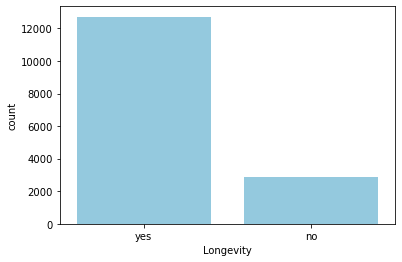

In [139]:
sns.countplot(df["Longevity"], color="skyblue")

#### 1.2.1.4 Year Birth

In [140]:
df['Year_Birth'].value_counts()

1982.0    441
1996.0    416
1980.0    383
1998.0    380
1981.0    369
         ... 
1947.0      9
1945.0      8
1943.0      6
1942.0      3
1936.0      2
Name: Year_Birth, Length: 75, dtype: int64

Variable has missing values. We will handle these missing values and then create a new variable called Age based on this

<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

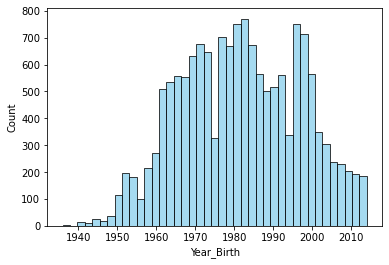

In [141]:
sns.histplot(df["Year_Birth"], color="skyblue")

#### 1.2.1.5 Type Travel

In [142]:
df['TypeTravel'].value_counts()

business    10756
leisure      4833
Name: TypeTravel, dtype: int64

Variable looks good to us and we will create dummies for it

<AxesSubplot:xlabel='TypeTravel', ylabel='count'>

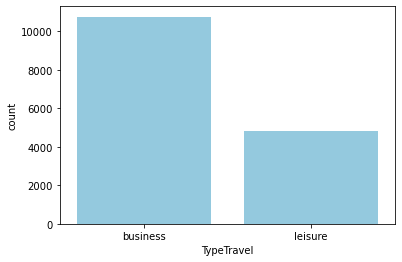

In [143]:
sns.countplot(df["TypeTravel"], color="skyblue")

#### 1.2.1.6 Room Type

In [144]:
df['RoomType'].value_counts()

single    7442
double    7021
suite     1126
Name: RoomType, dtype: int64

Variable looks good to us and we will create dummies for it

<AxesSubplot:xlabel='RoomType', ylabel='count'>

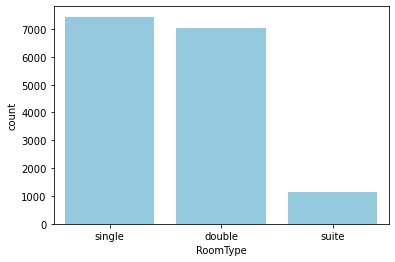

In [145]:
sns.countplot(df["RoomType"], color="skyblue")

#### 1.2.1.7 RewardPoints

In [146]:
df['RewardPoints'].value_counts()

5286    19
5010    17
5347    16
5094    16
4942    16
        ..
3656     1
2524     1
5974     1
3802     1
3304     1
Name: RewardPoints, Length: 4061, dtype: int64

Variable looks good to us, but because of the scale we will have to normalize all the variables in the dataframe

<AxesSubplot:xlabel='RewardPoints', ylabel='Count'>

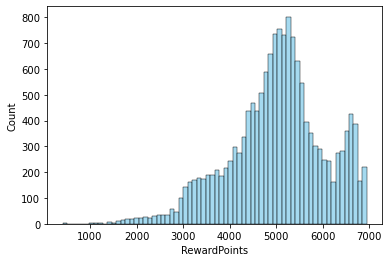

In [147]:
sns.histplot(df["RewardPoints"], color="skyblue")

#### 1.2.1.8 Ratings

All ratings variables look ok to us

<AxesSubplot:xlabel='BarService', ylabel='Count'>

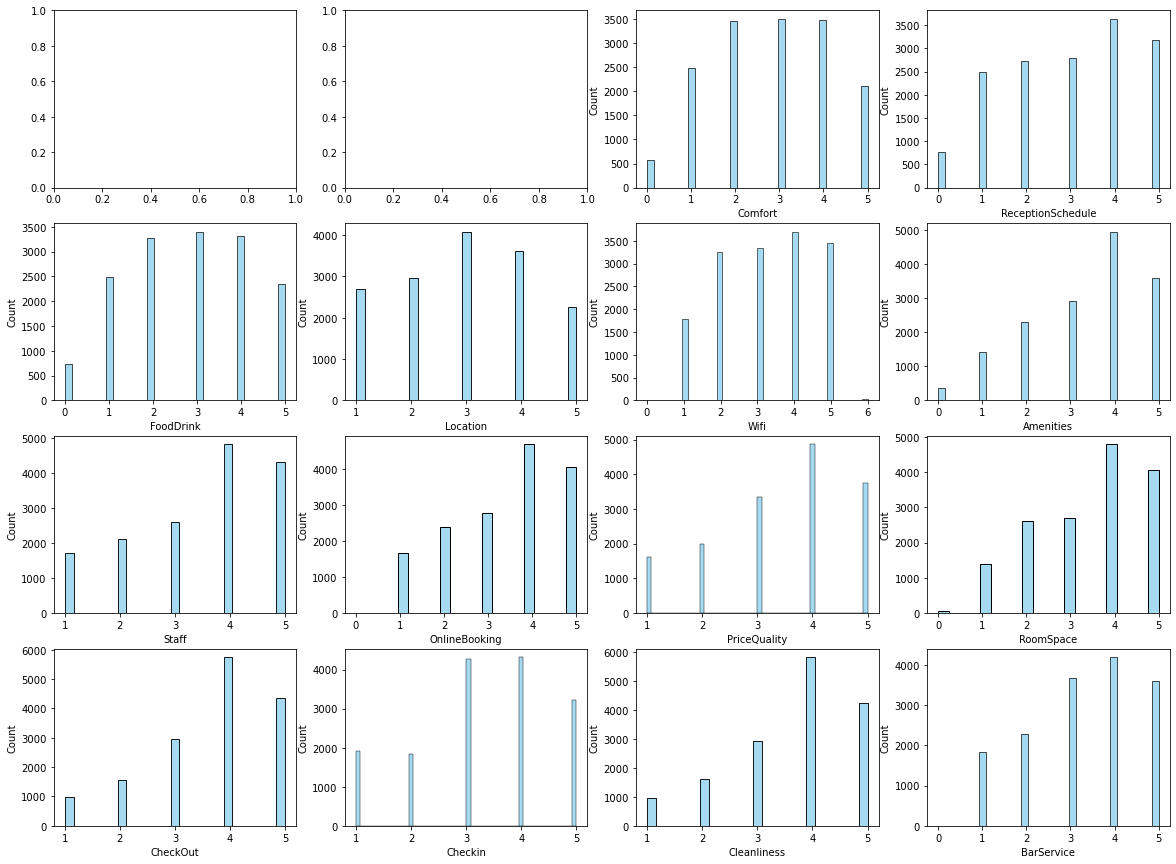

In [148]:
f, axes = plt.subplots(4,4, figsize=(20, 15), squeeze=False)  
sns.histplot(df["Comfort"], color="skyblue", ax=axes[0, 2])
sns.histplot(df["ReceptionSchedule"], color="skyblue", ax=axes[0, 3])
sns.histplot(df["FoodDrink"], color="skyblue", ax=axes[1, 0])
sns.histplot(df["Location"], color="skyblue", ax=axes[1, 1])
sns.histplot(df["Wifi"], color="skyblue", ax=axes[1, 2])
sns.histplot(df["Amenities"], color="skyblue", ax=axes[1, 3])
sns.histplot(df["Staff"], color="skyblue", ax=axes[2, 0])
sns.histplot(df["OnlineBooking"], color="skyblue", ax=axes[2, 1])
sns.histplot(df["PriceQuality"], color="skyblue", ax=axes[2, 2])
sns.histplot(df["RoomSpace"], color="skyblue", ax=axes[2, 3])
sns.histplot(df["CheckOut"], color="skyblue", ax=axes[3, 0])
sns.histplot(df["Checkin"], color="skyblue", ax=axes[3, 1])
sns.histplot(df["Cleanliness"], color="skyblue", ax=axes[3, 2])
sns.histplot(df["BarService"], color="skyblue", ax=axes[3, 3])

Upon looking at the charts, we noticed that 'Wifi' has values that should not be there, in particular, some surveys were marked with 6 which is not an available rating. 

In [149]:
df['Wifi'].value_counts()

4    3704
5    3446
3    3348
2    3245
1    1792
6      36
0      18
Name: Wifi, dtype: int64

Since there are only 36 rows with value 6, we will convert them to a 5.

In [150]:
df['Wifi'].replace(6,5, inplace=True)

In [151]:
df['Wifi'].value_counts()

4    3704
5    3482
3    3348
2    3245
1    1792
0      18
Name: Wifi, dtype: int64

<AxesSubplot:xlabel='Wifi', ylabel='Count'>

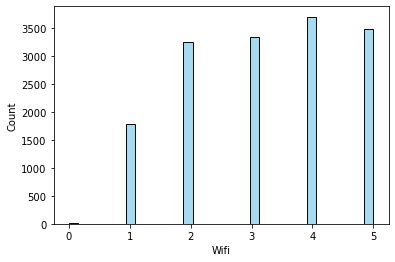

In [152]:
sns.histplot(df["Wifi"], color="skyblue")

#### 1.2.2 Outlier Observation Using Box Plot Chart

<AxesSubplot:xlabel='BarService'>

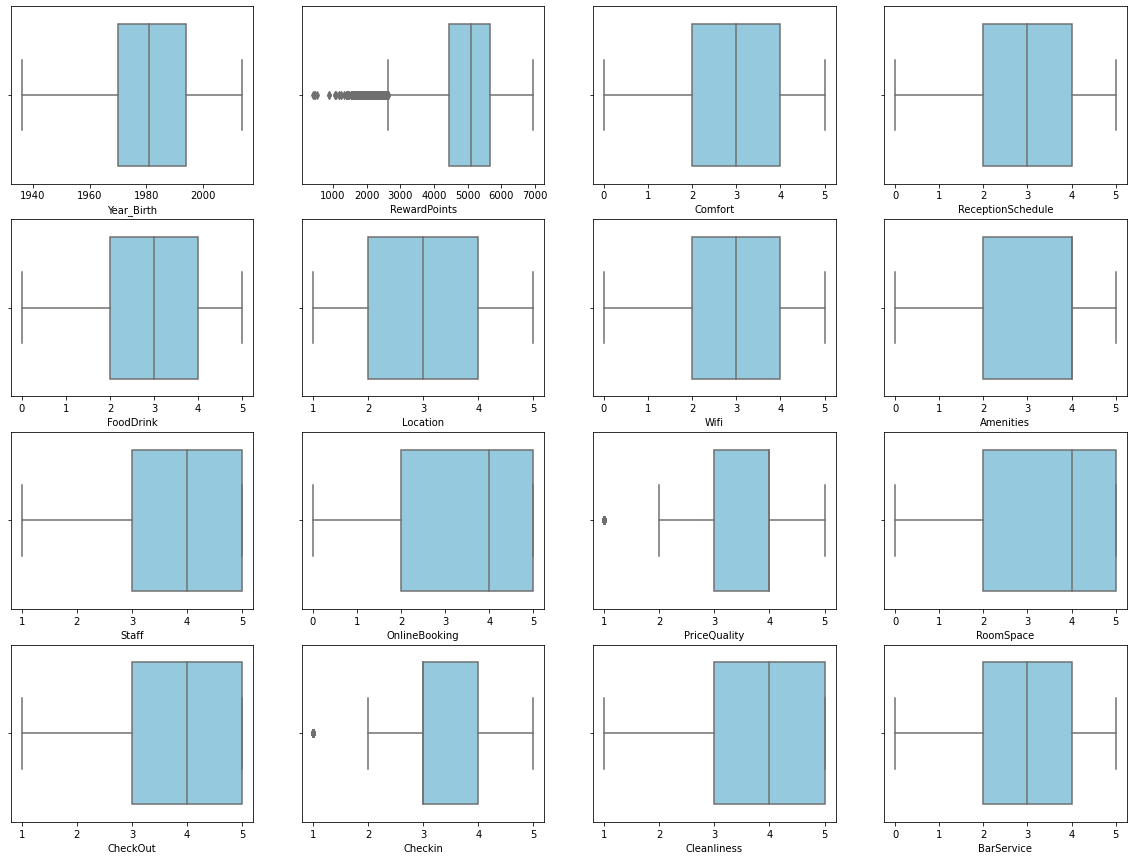

In [153]:
f, axes = plt.subplots(4,4, figsize=(20, 15), squeeze=False)    
sns.boxplot(df["Year_Birth"], color="skyblue", ax=axes[0, 0])
sns.boxplot(df["RewardPoints"], color="skyblue", ax=axes[0, 1])
sns.boxplot(df["Comfort"], color="skyblue", ax=axes[0, 2])
sns.boxplot(df["ReceptionSchedule"], color="skyblue", ax=axes[0, 3])
sns.boxplot(df["FoodDrink"], color="skyblue", ax=axes[1, 0])
sns.boxplot(df["Location"], color="skyblue", ax=axes[1, 1])
sns.boxplot(df["Wifi"], color="skyblue", ax=axes[1, 2])
sns.boxplot(df["Amenities"], color="skyblue", ax=axes[1, 3])
sns.boxplot(df["Staff"], color="skyblue", ax=axes[2, 0])
sns.boxplot(df["OnlineBooking"], color="skyblue", ax=axes[2, 1])
sns.boxplot(df["PriceQuality"], color="skyblue", ax=axes[2, 2])
sns.boxplot(df["RoomSpace"], color="skyblue", ax=axes[2, 3])
sns.boxplot(df["CheckOut"], color="skyblue", ax=axes[3, 0])
sns.boxplot(df["Checkin"], color="skyblue", ax=axes[3, 1])
sns.boxplot(df["Cleanliness"], color="skyblue", ax=axes[3, 2])
sns.boxplot(df["BarService"], color="skyblue", ax=axes[3, 3])

Looking at the box plots of all variables, we noticed 3 variables with possible outliers. These are: RewardPoints, PriceQuality, Checkin. These outliers will be handled later on.

#### 1.2.3 Pairplot of all variables of the dataframe

In [154]:
#sns.pairplot(df)

#### 1.2.4 Skewness of the variables of the Dataframe

In [155]:
df.skew()

Year_Birth          -0.003847
RewardPoints        -0.453779
Comfort             -0.100907
ReceptionSchedule   -0.260705
FoodDrink           -0.123610
Location            -0.050229
Wifi                -0.183010
Amenities           -0.599498
Staff               -0.554561
OnlineBooking       -0.472074
PriceQuality        -0.503381
RoomSpace           -0.482952
CheckOut            -0.750689
Checkin             -0.382588
Cleanliness         -0.745131
BarService          -0.358297
Gender               0.048900
dtype: float64

TODO: Analyze these results

#### 1.3 Missing Values

In [156]:
df.isna().sum()

Churn                  0
Longevity              0
Year_Birth           195
TypeTravel             0
RoomType               0
RewardPoints           0
Comfort                0
ReceptionSchedule      0
FoodDrink              0
Location               0
Wifi                   0
Amenities              0
Staff                  0
OnlineBooking          0
PriceQuality           0
RoomSpace              0
CheckOut               0
Checkin                0
Cleanliness            0
BarService             0
Gender                 0
dtype: int64

Year of Birth is the only variable with missing values. We have different methods to fill in these missing values like using the mode, mean or KNN Inputer. We decided to fill these missing values with the mode.

In [157]:
#df.fillna(int(df['Year_Birth'].mode()), inplace=True)
#print(int(df['Year_Birth'].mode())

import numpy as np

df_dropped = df.drop(columns=['Churn', 'RoomType', 'Longevity', 'TypeTravel'])

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
imputer_matrix = imputer.fit_transform(df_dropped)

data_cleaned = pd.DataFrame(data=imputer_matrix, columns = df_dropped.columns, index = df_dropped.index)
df['Year_Birth'] = data_cleaned['Year_Birth']

In [158]:
df.isna().sum()

Churn                0
Longevity            0
Year_Birth           0
TypeTravel           0
RoomType             0
RewardPoints         0
Comfort              0
ReceptionSchedule    0
FoodDrink            0
Location             0
Wifi                 0
Amenities            0
Staff                0
OnlineBooking        0
PriceQuality         0
RoomSpace            0
CheckOut             0
Checkin              0
Cleanliness          0
BarService           0
Gender               0
dtype: int64

In [159]:
#converter Year_Birth para integer
df['Year_Birth'] = df['Year_Birth'].astype('int64')

Now we have no missing values

#### 1.5 Duplicate Values

In [160]:
#create duplicate datafranme
duplicates = df.duplicated()

In [161]:
#visualize the duplicates
df[duplicates]

,Churn,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,...,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender
8195,nochurn,yes,1995,leisure,double,5098,5,5,5,5,...,5,5,3,3,4,3,3,3,5,0
9176,churn,yes,1991,business,suite,5932,3,3,2,3,...,3,3,3,4,1,4,3,4,3,0
9417,nochurn,yes,1972,business,double,6769,5,4,4,4,...,5,4,5,5,5,5,2,5,1,0


In [162]:
df.drop_duplicates(inplace = True)
df.shape

(15586, 21)

#### 1.6 Outliers

In [163]:
#method to return the boundaries of IQR 
def get_IQR_bounds(s):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    
    iqr = q3 - q1
    
    lower_bound = q1 -(1.5 * iqr)
    upper_bound = q3 +(1.5 * iqr)
    
    return (lower_bound,upper_bound)

##### 1.6.1 Removing Outliers on Reward Points

In [164]:
df['RewardPoints'].describe()

count    15586.000000
mean      5022.418581
std       1027.940126
min        409.000000
25%       4445.000000
50%       5088.000000
75%       5648.750000
max       6950.000000
Name: RewardPoints, dtype: float64

In [165]:
df = df[df['RewardPoints'] > get_IQR_bounds(df['RewardPoints'])[0]]

print("There are been",df_original_row_size - df.shape[0], "outliers removed")

There are been 293 outliers removed


<AxesSubplot:xlabel='RewardPoints', ylabel='Count'>

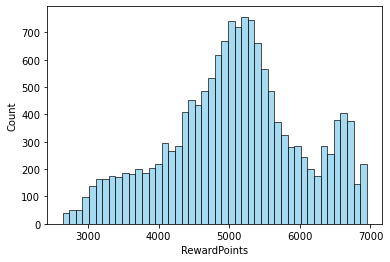

In [166]:
sns.histplot(df["RewardPoints"], color="skyblue")

##### 1.6.2 Removing Outliers on Ratings Variables

After some research and analysis on the subject, we decided not to remove outliers on the two ratings variables that presented outliers in the boxplot visualization. Those are 'PriceQuality' and 'Checkin'. The reason we did not remove them was because they were too many entries that would have to be removed, and if we did, we would effectively be shortening the rating scale for the rating data.

Instead, we will look for straight lining on the ratings entries, meaning people who answered all the answers with the same variable, which can mean they were in a rush and decided to fill the survey as fast as they could.

##### 1.6.1 Removing Outliers on Straight Lining entries to the Ratings Variables

In [167]:
df.columns

Index(['Churn', 'Longevity', 'Year_Birth', 'TypeTravel', 'RoomType',
       'RewardPoints', 'Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location',
       'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality',
       'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService',
       'Gender'],
      dtype='object')

In [168]:
straight_lining_entries = df[(df['Comfort'] == df['ReceptionSchedule']) & (df['Comfort'] == df['FoodDrink']) & (df['Comfort'] == df['Location']) & (df['Comfort'] == df['Wifi']) & (df['Comfort'] == df['Amenities']) & (df['Comfort'] == df['Staff']) & (df['Comfort'] == df['OnlineBooking']) & (df['Comfort'] == df['PriceQuality']) & (df['Comfort'] == df['RoomSpace']) & (df['Comfort'] == df['CheckOut']) & (df['Comfort'] == df['Checkin']) & (df['Comfort'] == df['Cleanliness']) & (df['Comfort'] == df['BarService'])]

In [169]:
straight_lining_entries

,Churn,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,...,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender
1548,nochurn,yes,1981,business,single,5289,4,4,4,4,...,4,4,4,4,4,4,4,4,4,1
15259,nochurn,yes,1976,business,single,6699,5,5,5,5,...,5,5,5,5,5,5,5,5,5,1


 #### Removing straight lines

In [170]:
df.drop(straight_lining_entries.index, axis=0, inplace=True)

We found 2 entries that are considered straight lining answers and we will remove them from the data

#### 1.7 Feature Engineering

##### 1.7.1 Creating Age Variable

In [171]:
df['Age'] = date.today().year - df['Year_Birth']

In [172]:
del df['Year_Birth']

In [883]:
age_analysis_col = ['Age', 'Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi',
'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace',
 'CheckOut', 'Checkin', 'Cleanliness', 'BarService']
likert_columns = ['Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi',
'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace',
 'CheckOut', 'Checkin', 'Cleanliness', 'BarService']

In [174]:
df_age_analysys = df[age_analysis_col].groupby('Age').mean()
df_age_analysys.head()

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Age,,,,,,,,,,,,,,
8,2.855422,3.445783,2.698795,3.168675,2.987952,3.048193,3.397590,3.349398,3.542169,3.530120,3.783133,3.361446,3.867470,3.216867
9,2.785714,3.142857,2.887755,3.000000,2.948980,2.938776,3.071429,3.051020,3.397959,3.377551,3.816327,3.285714,3.755102,3.000000
10,2.724490,3.346939,2.724490,3.061224,3.020408,2.969388,3.224490,3.142857,3.224490,3.244898,3.581633,3.204082,3.551020,3.071429
11,2.705263,3.200000,2.494737,2.768421,3.210526,2.989474,3.178947,3.284211,3.473684,3.221053,3.673684,3.305263,3.810526,3.273684
12,2.666667,3.200000,2.733333,3.038095,2.971429,2.895238,3.104762,3.038095,3.323810,3.219048,3.600000,3.276190,3.733333,3.019048


In [175]:
df_age_analysys.mean()

Comfort              2.848922
ReceptionSchedule    3.048737
FoodDrink            2.855800
Location             2.994868
Wifi                 3.205912
Amenities            3.262154
Staff                3.415234
OnlineBooking        3.380496
PriceQuality         3.360840
RoomSpace            3.434851
CheckOut             3.607079
Checkin              3.226350
Cleanliness          3.584075
BarService           3.261339
dtype: float64

In [176]:
df_age_analysys - df_age_analysys.mean()

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Age,,,,,,,,,,,,,,
8,0.006500,0.397046,-0.157005,0.173807,-0.217960,-0.213961,-0.017643,-0.031098,0.181328,0.095270,0.176054,0.135096,0.283394,-0.044471
9,-0.063207,0.094120,0.031955,0.005132,-0.256932,-0.323379,-0.343805,-0.329475,0.037119,-0.057300,0.209248,0.059364,0.171027,-0.261339
10,-0.124432,0.298202,-0.131310,0.066357,-0.185503,-0.292766,-0.190744,-0.237638,-0.136350,-0.189953,-0.025446,-0.022269,-0.033055,-0.189910
11,-0.143659,0.151263,-0.361063,-0.226447,0.004615,-0.272680,-0.236286,-0.096285,0.112844,-0.213798,0.066605,0.078913,0.226451,0.012345
12,-0.182255,0.151263,-0.122466,0.043228,-0.234483,-0.366916,-0.310472,-0.342400,-0.037031,-0.215803,-0.007079,0.049840,0.149258,-0.242291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,0.151078,0.201263,0.831700,0.442632,0.294088,0.237846,-0.352734,-0.192996,-0.423340,-0.372351,-0.669579,-0.913850,-0.459075,-0.323839
79,0.151078,0.451263,0.477534,0.505132,-0.205912,-0.928821,-0.915234,-0.213829,-0.027507,0.231816,-0.440412,-1.226350,-0.250742,0.071995
80,0.151078,0.284597,-0.189133,0.005132,1.460755,-0.928821,-0.748567,-0.380496,-0.360840,-0.434851,-0.607079,-0.893017,-0.584075,-1.928005


In [177]:
from scipy.stats import zscore
df_age_zscore = df_age_analysys.apply(zscore)
df_age_zscore[(abs(df_age_zscore[likert_columns]) > 2).any(1)]

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Age,,,,,,,,,,,,,,
72,0.128880,-0.321485,0.782995,0.676502,-2.320477,0.849226,-0.532170,-0.692083,-1.633600,-0.703541,-2.256637,-2.974001,-0.635316,-1.360574
73,0.837878,-0.832206,-0.197729,-0.336419,-2.576620,-0.485434,-0.463941,0.184339,-0.720591,-1.520253,-1.061821,-1.824260,-0.394007,-1.393406
74,-1.807895,0.699957,2.663837,1.006289,-0.886078,-0.194642,-0.054568,-2.992692,-2.515126,-3.492314,-3.000079,-1.086839,-2.746768,-1.935132
75,-1.626323,-1.180425,0.759485,0.016926,-0.348178,-0.820963,0.303634,-0.979659,-4.085344,0.272529,-3.650590,-2.002668,-1.796615,1.684587
76,0.290278,0.483287,1.974195,1.482650,0.548321,-1.168918,0.502635,-4.441224,-2.294745,-3.213437,-2.669660,-0.013747,-2.606005,0.248191
77,5.636585,3.694639,4.286062,4.139275,0.189721,0.744839,-0.144118,1.416808,0.046808,1.841214,-1.791987,-0.337525,-0.846461,0.391830
78,1.097268,0.560669,2.346445,1.459748,1.265521,0.744839,-1.263498,-0.740013,-1.399445,-1.557603,-2.488963,-3.043382,-1.163179,-1.116386
79,1.097268,1.257107,1.347247,1.665865,-0.886078,-2.908698,-3.278383,-0.819895,-0.090930,0.969722,-1.637103,-4.084096,-0.635316,0.248191
80,1.097268,0.792815,-0.533594,0.016926,6.285917,-2.908698,-2.681380,-1.458953,-1.192837,-1.819051,-2.256637,-2.974001,-1.479897,-6.646514


In [178]:
df[df['Age'] > 72]

,Churn,Longevity,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,...,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age
182,churn,yes,business,single,6713,3,5,5,5,2,...,3,3,3,3,3,1,3,4,1,75
250,churn,yes,business,suite,5498,3,4,3,4,3,...,3,3,1,4,4,2,3,3,1,79
255,churn,yes,business,double,6439,1,2,2,2,4,...,4,1,1,1,1,1,1,4,0,81
403,churn,yes,business,double,6806,2,4,4,4,5,...,4,2,2,2,2,3,2,3,0,76
425,nochurn,yes,business,double,6936,4,2,2,2,4,...,2,4,4,4,4,3,4,4,0,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14706,nochurn,yes,business,single,4566,2,2,4,2,3,...,3,4,4,4,5,2,4,1,1,74
15109,nochurn,yes,business,double,6127,5,3,3,3,4,...,1,5,5,5,5,5,5,4,0,73
15132,nochurn,yes,business,single,3300,4,4,4,4,3,...,5,3,3,2,3,4,3,5,1,76
15494,churn,yes,business,single,5369,4,1,1,1,5,...,3,4,4,4,4,3,4,2,1,78


We thought about removing the rows with age less than 10 years old because we considered people this young to not be able to answer properly unless an adult helps them. However, because of the high number of entries, we decided not to remove them.

# TODO GROUP BY AGE AND CHECK MEANS OF ANSWERS

#### 1.8 Creating Dummies and Binary variables

The following variables need dummies: RoomType  
The following variables are binary: Churn, Longevity, TypeTravel

In [179]:
#churn = 1, nochurn = 0
df['Churn'] = [1 if i == 'churn' else 0 for i in df["Churn"]]

In [180]:
#yes = 1, no = 0
df['Longevity'] = [1 if i == 'yes' else 0 for i in df["Longevity"]]

In [181]:
#business = 1, leisure = 0
df['TypeTravel'] = [1 if i == 'business' else 0 for i in df["TypeTravel"]]

In [182]:
df = pd.get_dummies(df, drop_first = True)
df

,Churn,Longevity,TypeTravel,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,...,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age,RoomType_single,RoomType_suite
0,1,1,1,4907,3,4,1,4,4,3,...,3,3,3,4,3,4,0,48,1,0
1,0,1,1,6724,1,1,1,1,5,3,...,5,5,5,1,5,2,1,57,1,0
2,1,1,1,4365,3,3,3,3,1,4,...,3,2,3,2,3,1,1,49,1,0
3,0,1,0,3849,1,1,1,1,4,4,...,4,4,4,4,4,3,0,29,0,0
4,0,1,1,5376,2,2,3,2,5,5,...,5,3,4,1,3,5,1,33,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,1,0,1,4968,2,0,2,2,3,2,...,4,5,1,3,4,3,0,34,0,0
15585,1,0,1,4970,3,3,3,3,5,3,...,3,1,3,4,4,5,0,22,0,0
15586,0,1,1,4046,1,1,1,1,3,4,...,4,4,4,5,4,4,1,58,1,0
15587,0,1,0,5155,4,3,4,4,5,4,...,2,5,4,3,4,5,1,30,0,0


#### 1.9 Normalizing variables

Because the variable 'RewardPoints' is in a scale that is very different from the rest, we decided to normalize the dataframe

In [1111]:
from scipy.stats import zscore
df['global_avg'] = df[likert_columns].mean(axis=1)
# df.drop('RoomType_single', inplace=True, axis=1)
df_zscored = df.copy()
zscore_columns = ['Comfort',
 'ReceptionSchedule',
 'FoodDrink',
 'Location',
 'Wifi',
 'Amenities',
 'Staff',
 'OnlineBooking',
 'PriceQuality',
 'RoomSpace',
 'CheckOut',
 'Checkin',
 'Cleanliness',
 'BarService',
 'RewardPoints',
 'global_avg']
df_zscored[zscore_columns] = df_zscored[zscore_columns].apply(zscore)
df['global_avg']

0        3.285714
1        3.142857
2        2.714286
3        3.142857
4        3.571429
           ...   
15584    2.714286
15585    3.571429
15586    3.214286
15587    4.071429
15588    3.142857
Name: global_avg, Length: 15294, dtype: float64

In [1316]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#Confort FoodDrink
#BarService Wifi Staff OnlineBooking
#Staff Wifi Amenities OnlineBooking
#FoodDrink Confort ReceptionSchedule Location
df_test = df.drop(['BarService', 'Cleanliness', 'Staff','FoodDrink'], axis=1)

std_scaler = StandardScaler()
norm_scaler = MinMaxScaler()
df_standarized = pd.DataFrame(std_scaler.fit_transform(df_test), columns = df_test.columns, index=df_test.index)
df_normalized = pd.DataFrame(norm_scaler.fit_transform(df_test), columns= df_test.columns, index=df_test.index)
df_standarized[['Churn', 'Gender', 'Longevity']] = df[['Churn', 'Gender', 'Longevity']]

# TODO CREATE RATING NORMALIZATION BY HAND

#### 1.10 Correlation Matrix

<AxesSubplot:>

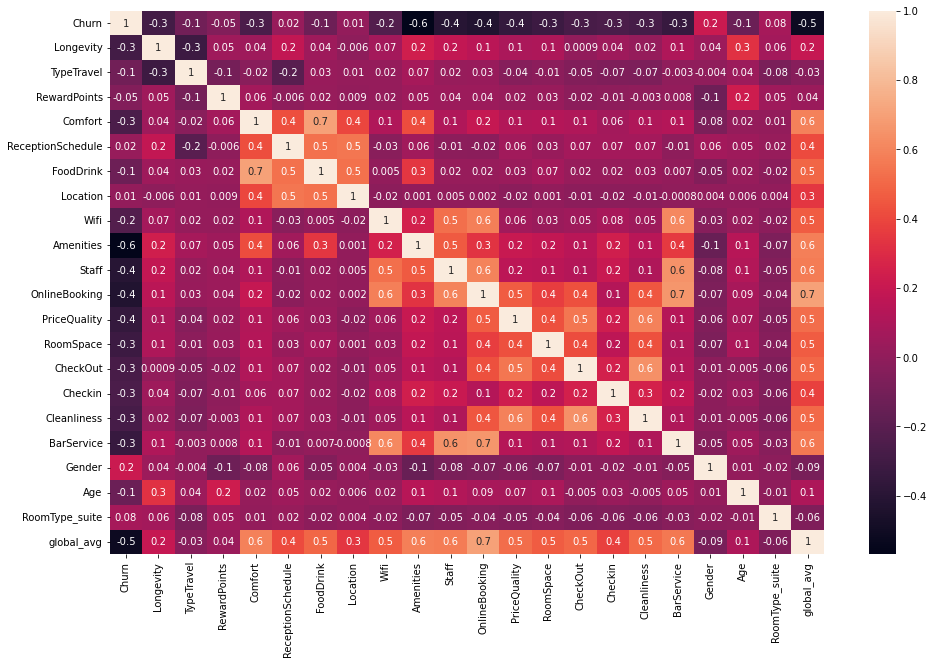

In [1314]:
df_corr = df.corr(method = 'spearman')
figure = plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, fmt = '.1g')

### First try DBSCAN https://machinelearningknowledge.ai/tutorial-for-dbscan-clustering-in-python-sklearn/

In [1079]:
df_standarized['global_avg']

0       -0.026419
1       -0.240143
2       -0.881317
3       -0.240143
4        0.401031
           ...   
15584   -0.881317
15585    0.401031
15586   -0.133281
15587    1.149067
15588   -0.240143
Name: global_avg, Length: 15294, dtype: float64

In [1346]:
df_for_dbscan = df_standarized.drop(['global_avg', 'RoomType_suite'], axis=1)
#df_normalized 
#df_rw_zscore

#df_for_dbscan = df.drop(['global_avg','RewardPoints', 'RoomType_suite', 'Gender', 'Age', 'Churn', 'Longevity', 'TypeTravel'], axis=1)
#df_for_dbscan = df_standarized[['global_avg','RewardPoints', 'RoomType_suite',
#                                'Gender', 'Age', 'Churn', 'Longevity', 'TypeTravel']]
df_for_dbscan = df_pca_only

In [1347]:
minPts = len(df_for_dbscan.columns) + 1

In [1348]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [1349]:
dbscan_cluster1 = DBSCAN(eps=0.1, min_samples=8)
dbscan_cluster1.fit(df_for_dbscan.dropna())

DBSCAN(eps=0.1, min_samples=8)

In [1350]:
dbscan_cluster1.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [1351]:
# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

Estimated no. of clusters: 0


In [1352]:
# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

Estimated no. of noise points: 15294


Finding the Optimal value of Epsilon
Rather than experimenting with different values of epsilon, we can use the elbow point detection method to arrive at a suitable value of epsilon.

In this approach, the average distance between each point and its k nearest neighbors is calculated where k = the MinPts selected by us. We then plot the average k-distances in ascending order on a k-distance graph

The optimal value for epsilon is the point with maximum curvature or bend, i.e. at the greatest slope.

Let us implement this technique below and generate a graph.

Text(0, 0.5, 'Distance')

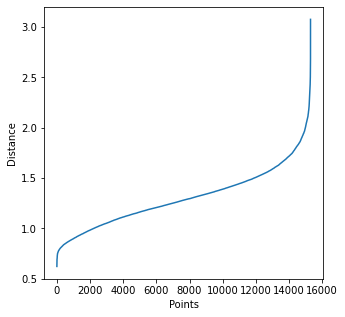

In [1353]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(df_for_dbscan)

distances, indices = neighbors.kneighbors(df_for_dbscan)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

1.6185720021562797


<Figure size 360x360 with 0 Axes>

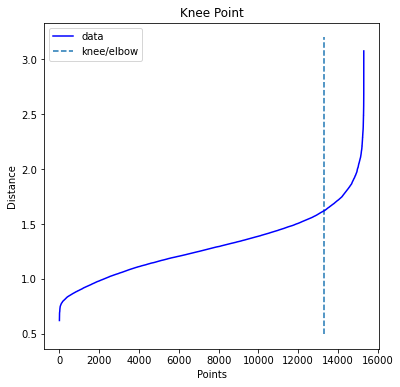

In [1354]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [1357]:
dbscan_cluster1 = DBSCAN(eps=1.6185720021562797, min_samples=minPts)
dbscan_cluster1.fit(df_for_dbscan)

DBSCAN(eps=1.6185720021562797, min_samples=9)

In [1358]:
# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

Estimated no. of clusters: 1


In [1359]:
list(dbscan_cluster1.labels_).count()

TypeError: list.count() takes exactly one argument (0 given)

In [1311]:
# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

Estimated no. of noise points: 327


Text(0, 0.5, '$x_2$')

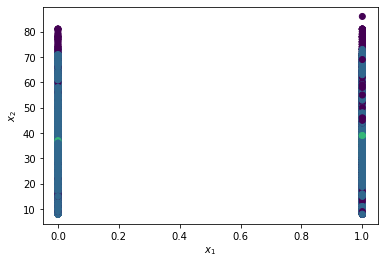

In [1034]:
plt.scatter(df_for_dbscan['Churn'], 
df_for_dbscan['Age'], 
c=dbscan_cluster1.labels_)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [ ]:
df_for_dbscan['cluster'] = dbscan_cluster1.labels_
len(df_for_dbscan[df_for_dbscan['RoomType_suite'] == 1])/len(df_for_dbscan[df_for_dbscan['RoomType_suite'] == 0])

In [781]:
df_for_dbscan.head()

,Churn,Longevity,TypeTravel,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,...,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age,RoomType_suite
0,1,1,1,-0.179120,0.111340,0.659378,-1.282046,0.781583,0.575899,-0.274676,...,-0.345794,-0.366359,-0.367210,-0.603975,0.529825,-0.603038,0.504413,0,48,0
1,0,1,1,1.727438,-1.328083,-1.313339,-1.282046,-1.529469,1.331544,-0.274676,...,1.179169,1.211310,1.179503,1.120831,-1.839978,1.131561,-1.033104,1,57,0
2,1,1,1,-0.747835,0.111340,0.001806,0.109947,0.011232,-1.691036,0.463878,...,-0.345794,-0.366359,-1.140567,-0.603975,-1.050044,-0.603038,-1.801862,1,49,0
3,0,1,0,-1.289268,-1.328083,-1.313339,-1.282046,-1.529469,0.575899,0.463878,...,0.416688,0.422476,0.406146,0.258428,0.529825,0.264262,-0.264345,0,29,0
4,0,1,1,0.312997,-0.608371,-0.655767,0.109947,-0.759119,1.331544,1.202433,...,1.179169,1.211310,-0.367210,0.258428,-1.839978,-0.603038,1.273171,1,33,0


In [731]:
df_for_dbscan.groupby('cluster').mean()

,Churn,Longevity,TypeTravel,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,...,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age,RoomType_suite
cluster,,,,,,,,,,,,,,,,,,,,,
-1,0.457827,0.81241,0.684844,5077.706094,2.845299,2.997254,2.84203,2.985419,3.237871,3.371911,...,3.453511,3.46443,3.474827,3.70034,3.329279,3.695305,3.34386,0.488035,40.498758,0.073427


In [459]:
df.columns

Index(['Churn', 'Longevity', 'TypeTravel', 'RewardPoints', 'Comfort',
       'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi', 'Amenities',
       'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace', 'CheckOut',
       'Checkin', 'Cleanliness', 'BarService', 'Gender', 'Age',
       'RoomType_single', 'RoomType_suite', 'global_avg'],
      dtype='object')

In [446]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(df[])
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])
principal_breast_Df.tail()

SyntaxError: invalid syntax (Temp/ipykernel_13664/1948527634.py, line 3)

In [340]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.99500031 0.00236615]


In [ ]:
'Comfort' 'Amenities'

In [122]:
df.columns[5:-2]

Index(['Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi',
       'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace',
       'CheckOut', 'Checkin', 'Cleanliness', 'BarService'],
      dtype='object')

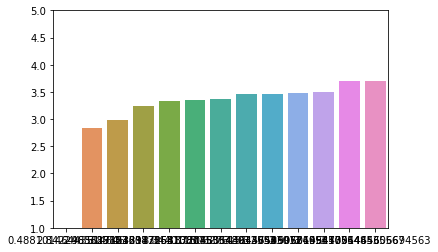

In [114]:
likert_questions = df.iloc[:,7:-1]
question_means = likert_questions.mean(axis = 0)
grand_mean = question_means.mean()
sns.barplot(x=question_means.index, y=question_means.values, data=question_means)
plt.ylim(1,5)
plt.show()

In [ ]:
https://towardsdatascience.com/customer-segmentation-unsupervised-machine-learning-algorithms-in-python-3ae4d6cfd41d

In [482]:
from scipy.cluster.hierarchy import dendrogram, linkage
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

def plot_hierarchical_clusters(data):
    Z1 = linkage(data, method='average', metric='euclidean')
    Z2 = linkage(data, method='complete', metric='cityblock')

    fig = plt.figure(figsize=(14,6))

    ax1 = plt.subplot(1,2,1)    
    dendrogram(Z1)
    ax1.set_xticks([])

    plt.title("method=average, metric=euclidic")

    ax2 = plt.subplot(1,2,2)
    dendrogram(Z2)
    ax2.set_xticks([])

    plt.title("method=complete, metric=cityblock")

    plt.show()

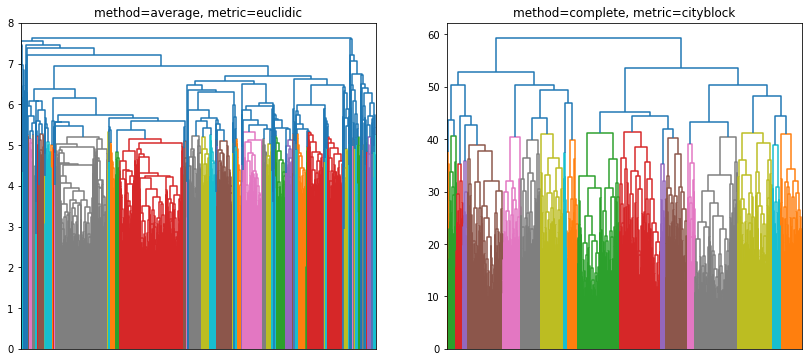

In [483]:
plot_hierarchical_clusters(df_standarized)

In [ ]:
https://github.com/tjkemp/likert-clusters/blob/master/likert-clusters.ipynb

In [ ]:
https://medium.com/@blazetamareborn/practicing-clustering-techniques-on-survey-dataset-f7d7a322e6ff

In [1338]:
df_for_pca = df_standarized
#df_for_pca = df_normalized 
#df_for_pca = df_zscored

In [1339]:
df_for_pca = df_for_pca.drop(['RoomType_suite', 'global_avg'], axis=1)
#df_for_pca = df_for_pca[['Age','RewardPoints', 'RoomType_suite',
#                               'Gender', 'Churn', 'Longevity', 'TypeTravel']]

In [1340]:
df_for_pca['Age']

0        0.495312
1        1.089588
2        0.561342
3       -0.759270
4       -0.495148
           ...   
15584   -0.429117
15585   -1.221485
15586    1.155618
15587   -0.693240
15588   -0.098964
Name: Age, Length: 15294, dtype: float64

In [1345]:
df_pca = df.copy()
cols = [0] * 8
for i in range(0,8):
    df_pca[f'pca_{i}'] = X_pca[:,i] 
    cols[i] = f'pca_{i}'
df_pca_only = pd.DataFrame(X_pca, columns=cols, index=df_pca.index)

In [1343]:
pca = PCA(n_components = 8, random_state=1)
X_pca = pca.fit_transform(df_for_pca)

In [1344]:
pca.explained_variance_ratio_.cumsum()

array([0.2104631 , 0.34749671, 0.45120945, 0.54201527, 0.62099056,
       0.69349543, 0.75398892, 0.80923866])

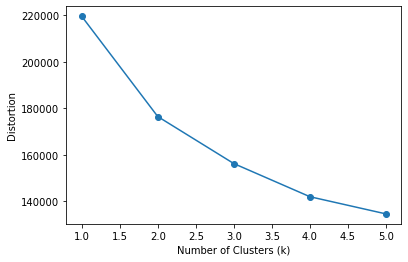

In [1204]:
from sklearn.cluster import KMeans

distortions = []
K_to_try = range(1, 6)

for i in K_to_try:
    model = KMeans(
            n_clusters=i,
            init='k-means++',
            n_jobs=-1,
            random_state=1)
    model.fit(X_pca)
    distortions.append(model.inertia_)
plt.plot(K_to_try, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

In [1205]:
# use the best K from elbow method
model = KMeans(
    n_clusters=3,
    init='k-means++',
    n_jobs=-1,
    random_state=1)

model = model.fit(X_pca)

y = model.predict(X_pca)

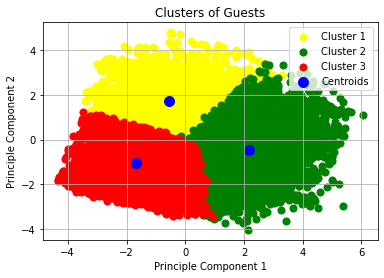

In [1206]:
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], s = 50, c = 'yellow', label = 'Cluster 1')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], s = 50, c = 'green', label = 'Cluster 2')
plt.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], s = 50, c = 'red', label = 'Cluster 3')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'Centroids')
plt.title('Clusters of Guests')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.legend()
plt.grid()
plt.show()